In [1]:
import numpy as np
import cv2 as cv

import matplotlib.pyplot as plt

In [5]:
def root_matching(x,y,Trees,Checks):
    
    img1 = cv.imread(x,cv.IMREAD_GRAYSCALE)         
    img2 = cv.imread(y,cv.IMREAD_GRAYSCALE) 
    # Initiating SIFT 
    sift = cv.SIFT_create()
    #  keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = Trees)
    search_params = dict(checks =Checks)
    # Initiating Flann
    flann = cv.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)

    # Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    if len(good)>10:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

        M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()

        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv.perspectiveTransform(pts,M)

        img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

    else:
        
        print ('Not enough matches were found:Less than 10 ' ) 
        matchesMask = None
        
    draw_params = dict(matchColor = (0,255,0), # matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # inliers
                   flags = 2)

    res = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    cv.imwrite('{}_img1_&{}_img2_sift_matching.jpg'.format(x[:13],y[:13]),res)

    plt.imshow(res),plt.show()

In [6]:



list1=[('CW_T008_L001_15.10.18_151601_014_SS.tiff','CW_T008_L001_26.07.18_172736_008_SS.tiff'),('AD_T046_L001_02.10.18_151817_013_SS.tiff','AD_T046_L001_25.07.18_122220_008_SS.tiff'),('CW_T004_L002_14.11.19_151953_027_CA.tiff','CW_T004_L002_01.09.18_164450_011_SS.tiff'),('CW_T001_L003_02.08.19_093548_022_CA.tiff','CW_T001_L003_06.08.18_174938_009_SS.tiff'),('mesocosms_T006_L002_20.06.19_143752_009_GBW.tiff','mesocosms_T006_L002_23.06.19_172616_012_GBW.tiff')]





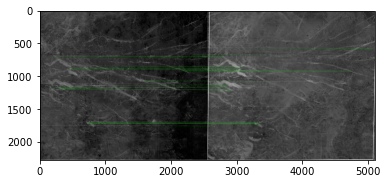

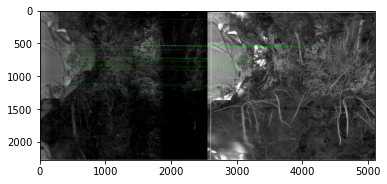

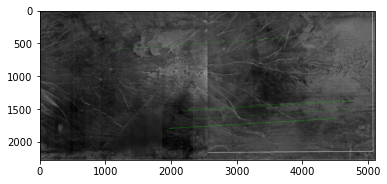

Not enough matches were found:Less than 10 


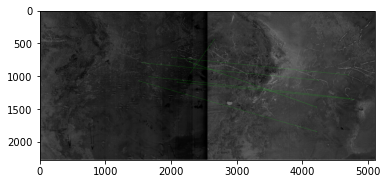

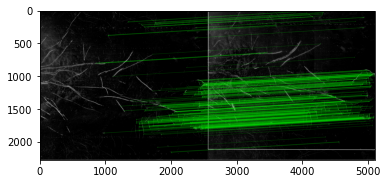

In [7]:
for x,y in list1:
    root_matching(x,y,5,50)